In [11]:
from sklearn.datasets import load_iris  # 붓꽃(iris) 데이터셋을 불러오는 함수
import pandas as pd  # 데이터 분석을 위한 pandas 라이브러리
import matplotlib.pyplot as plt  # 그래프 그리기용 matplotlib 라이브러리

iris = load_iris()  # iris 데이터셋을 불러와서 변수에 저장

# 꽃잎 길이, 너비 등 4가지 특성 데이터를 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 타깃 데이터(0, 1, 2로 구성된 꽃 종류)를 DataFrame으로 변환
target_df = pd.DataFrame(data=iris.target, columns=['species'])
target_df.head()

# 숫자로 되어 있는 꽃 종류를 보기 쉽게 이름으로 바꿔주는 함수
def converter(species):
    if species == 0:
        return 'setosa'  # 0이면 setosa
    elif species == 1:
        return 'versicolor'  # 1이면 versicolor
    else:
        return 'virginica'  # 2이면 virginica

# 각 행의 species 값을 위 converter 함수로 변환 (0→'setosa' 등)
target_df['species'] = target_df['species'].apply(converter)

# 꽃의 특성 정보와 종 정보를 하나의 표로 합치기 (열 기준 합치기)
iris_df = pd.concat([iris_df, target_df], axis=1)

# 데이터프레임의 앞 5줄을 출력해서 잘 합쳐졌는지 확인
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# virginica 종의 꽃잎 길이만 추출하여 리스트 X에 저장
X = [
    iris_df['petal length (cm)'][a]
    for a in iris_df.index
    if iris_df['species'][a] == 'virginica'
]

# virginica 종의 꽃받침 길이만 추출하여 리스트 Y에 저장
Y = [
    iris_df['sepal length (cm)'][a]
    for a in iris_df.index
    if iris_df['species'][a] == 'virginica'
]

# 결과 출력
print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)


petal length(꽃잎 길이) [np.float64(6.0), np.float64(5.1), np.float64(5.9), np.float64(5.6), np.float64(5.8), np.float64(6.6), np.float64(4.5), np.float64(6.3), np.float64(5.8), np.float64(6.1), np.float64(5.1), np.float64(5.3), np.float64(5.5), np.float64(5.0), np.float64(5.1), np.float64(5.3), np.float64(5.5), np.float64(6.7), np.float64(6.9), np.float64(5.0), np.float64(5.7), np.float64(4.9), np.float64(6.7), np.float64(4.9), np.float64(5.7), np.float64(6.0), np.float64(4.8), np.float64(4.9), np.float64(5.6), np.float64(5.8), np.float64(6.1), np.float64(6.4), np.float64(5.6), np.float64(5.1), np.float64(5.6), np.float64(6.1), np.float64(5.6), np.float64(5.5), np.float64(4.8), np.float64(5.4), np.float64(5.6), np.float64(5.1), np.float64(5.1), np.float64(5.9), np.float64(5.7), np.float64(5.2), np.float64(5.0), np.float64(5.2), np.float64(5.4), np.float64(5.1)]
sepal length(꽃받침의 길이) [np.float64(6.3), np.float64(5.8), np.float64(7.1), np.float64(6.3), np.float64(6.5), np.float64(7.6), np.f

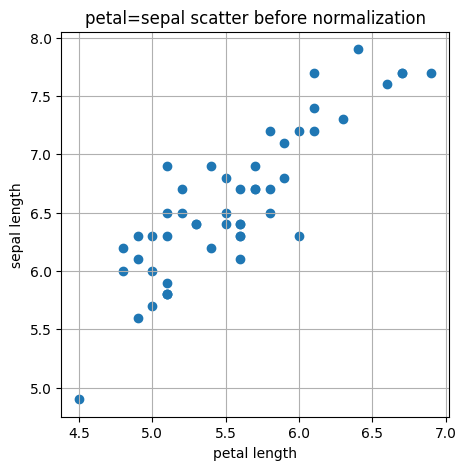

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal=sepal scatter before normalization')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.grid()
plt.show()

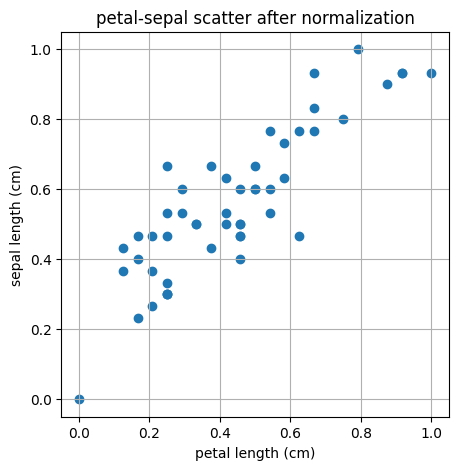

In [15]:
# 정규화를 위한 함수(min-max scaling)를 sklearn에서 불러옵니다
from sklearn.preprocessing import minmax_scale

# X 리스트의 값을 0~1 사이로 정규화 (최솟값은 0, 최댓값은 1이 되도록)
X_scale = minmax_scale(X)

# Y 리스트의 값도 같은 방식으로 정규화
Y_scale = minmax_scale(Y)

# 그래프 사이즈 설정 (가로 5인치, 세로 5인치)
plt.figure(figsize=(5, 5))

# 정규화된 X와 Y 값을 기준으로 산점도(Scatter plot) 그리기
plt.scatter(X_scale, Y_scale)

# 그래프 제목 설정
plt.title('petal-sepal scatter after normalization')

# x축 이름 설정 (정규화된 꽃잎 길이)
plt.xlabel('petal length (cm)')

# y축 이름 설정 (정규화된 꽃받침 길이)
plt.ylabel('sepal length (cm)')

# 그래프 배경에 격자(그리드) 표시
plt.grid()

# 그래프 화면에 출력
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" % (a[0], b))

기울기 : 1.00, 절편 : 1.06


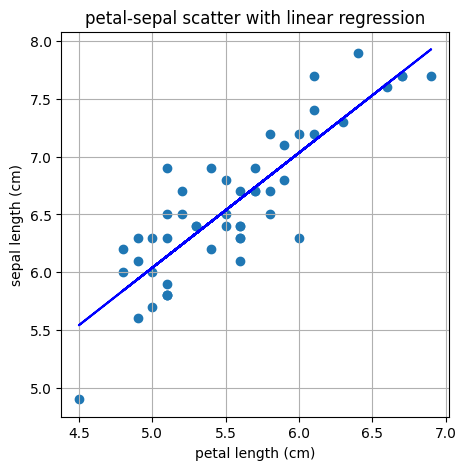

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


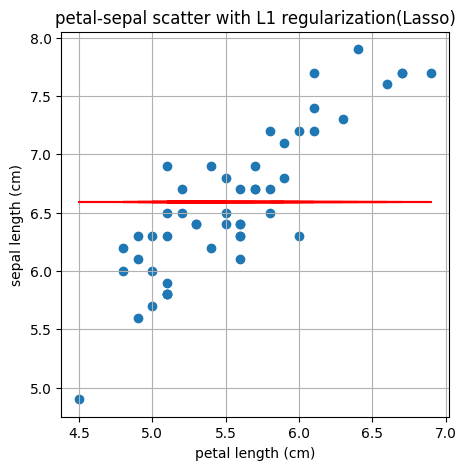

In [24]:
# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# 모델 생성
L1 = Lasso()

# 학습용 데이터 (X, Y)는 numpy 배열이어야 함
X = np.array(X)
Y = np.array(Y)

# Lasso 모델 학습
L1.fit(X.reshape(-1, 1), Y) 

# 기울기와 절편 추출
a, b = L1.coef_[0], L1.intercept_  

# 출력
print("기울기 : %0.2f, 절편 : %0.2f" % (a, b))

# 시각화
plt.figure(figsize=(5, 5))
plt.scatter(X, Y)  # 원래 데이터 점 찍기
plt.plot(X, L1.predict(X.reshape(-1, 1)), color='red')  # [[YOUR CODE]]: 예측 선 그리기
plt.title('petal-sepal scatter with L1 regularization(Lasso)')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()


기울기 : 0.93, 절편 : 1.41


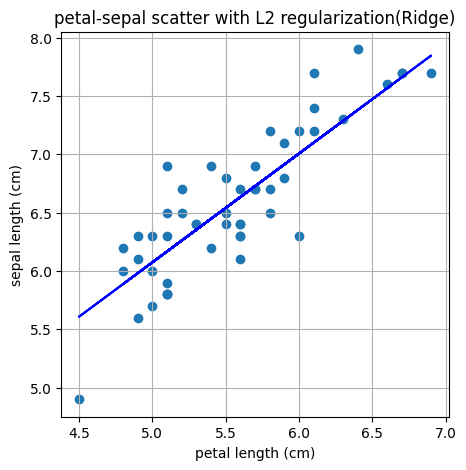

In [30]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge

L2 = Ridge()

X = np.array(X)
Y = np.array(Y)

L2.fit(X.reshape(-1,1),Y)
a, b = L2.coef_[0], L2.intercept_

print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
# [[YOUR CODE]]
plt.scatter(X,Y)
plt.plot(X, L2.predict(X.reshape(-1,1)), color = 'blue')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()